In [442]:
import sklearn as sk
import pandas as pd
import random
import numpy as np

In [443]:
import matplotlib.pyplot as plt

In [444]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**Задание 1: Knn работает хуже, чем logistic regression**

In [445]:
X1 = np.array([[random.randint(0, 3), random.randint(0, 100)] for _ in range(100)])

In [446]:
y1 = np.zeros(100)

In [447]:
X2 = np.array([[random.randint(4, 7), random.randint(0, 100)] for _ in range(100)])

In [448]:
y2 = np.ones(100)

In [449]:
X = np.concatenate((X1, X2), axis=0)

In [450]:
y = np.concatenate((y1, y2), axis=0)

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [452]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [453]:
xs1 = [x[0] for x in X1]
ys1 = [x[1] for x in X1]

In [454]:
xs2 = [x[0] for x in X2]
ys2 = [x[1] for x in X2]

In [455]:
#K-nn
model = KNeighborsClassifier(n_neighbors=1) #если увеличивать количество соседей, то будет хуже.

In [456]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [457]:
acc = model.score(X_test, y_test)

In [458]:
acc

0.875

In [459]:
#Logisic regression
logisticRegr = LogisticRegression()

In [460]:
logisticRegr.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [461]:
acc1 = logisticRegr.score(X_test, y_test)

In [462]:
acc1

0.95

**Возможное объяснение:** такое распределение значит, что "соседи" будут удалены друг от друга, поэтому KNN работает хуже. И, чем большее число соседей мы будем смотреть, тем точность будет хуже

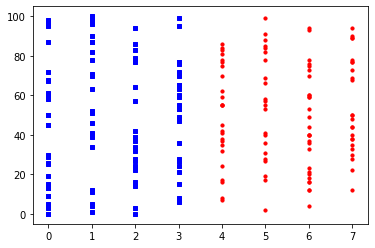

In [463]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xs1, ys1, s=10, c='b', marker="s", label='first')
ax1.scatter(xs2, ys2, s=10, c='r', marker="o", label='second')
plt.show()

**Задание 2: logistic regression работает хуже, чем knn**

In [464]:
X1_new = np.array([[random.choice([0, 100]), random.randint(0, 100)] for _ in range(100)])

In [465]:
y1_new = np.zeros(100)

In [466]:
X2_new = np.array([[random.randint(0, 100), random.choice([0, 100])] for _ in range(100)])

In [467]:
y2_new = np.ones(100)

In [468]:
X_new = np.concatenate((X1_new, X2_new), axis=0)

In [469]:
y_new = np.concatenate((y1_new, y2_new), axis=0)

In [470]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.20, random_state=42)

In [471]:
X_train_new, X_validate_new, y_train_new, y_validate_new = train_test_split(X_train_new, y_train_new, test_size=0.25, random_state=42)

In [472]:
#K-nn
model_new = KNeighborsClassifier(n_neighbors=1) 

In [473]:
model_new.fit(X_train_new, y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [474]:
acc_new = model_new.score(X_test_new, y_test_new)

In [475]:
acc_new

1.0

In [476]:
#Logisic regression
logisticRegr_new = LogisticRegression()

In [477]:
logisticRegr_new.fit(X_train_new, y_train_new)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [478]:
acc1_new = logisticRegr_new.score(X_test_new, y_test_new)

In [479]:
acc1_new

0.55

**Возможное объяснение:** Соседи есть, а регулярное распределение данных сбивает алгоритм (LogisticRegression), которому лучше подавать случайно распределенные величины.

In [480]:
xs1_new = [x[0] for x in X1_new]
ys1_new = [x[1] for x in X1_new]

In [481]:
xs2_new = [x[0] for x in X2_new]
ys2_new = [x[1] for x in X2_new]

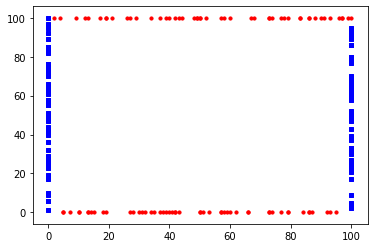

In [482]:
fig_new = plt.figure()
ax1_new = fig_new.add_subplot(111)
ax1_new.scatter(xs1_new, ys1_new, s=10, c='b', marker="s", label='first')
ax1_new.scatter(xs2_new, ys2_new, s=10, c='r', marker="o", label='second')
plt.show()